# Is Fandango being Shady?

Fandango was hiding the true ratings from their users, presumably to sell more tickets online. Walt Hickey, data badass, investigated their unhidden data in the page's HTML and totally ousted them. Now they hid that shit and we are performing further analysis to see if they have even changed the way they round up. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
fandango = pd.read_csv("fandango_score_comparison.csv")
all_reviews = pd.read_csv("movie_ratings_16_17.csv")

In [3]:
all_reviews.columns

Index(['movie', 'year', 'metascore', 'imdb', 'tmeter', 'audience', 'fandango',
       'n_metascore', 'n_imdb', 'n_tmeter', 'n_audience', 'nr_metascore',
       'nr_imdb', 'nr_tmeter', 'nr_audience'],
      dtype='object')

In [4]:
iso_fandango = fandango[['FILM','Fandango_Stars','Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]

In [5]:
other_dataset = all_reviews[['movie','year','fandango']]

The population we are interested in is the true ratings for Fandango. We want to see if there is a change between their actual scores to see if they are inaccurately representing user ratings. 

The sampling is not exactly random since not every movie has the same chance of being collected. 

Since the data we are dealing with is only movies after 2015 with a score above a certain threshold, our goals shift from investigating the score changes on all movies to seeing if Fandango scores on the most popular movies at the time have significantly changed since Fandango made their changes. 

Now we have two populations that we want to compare. 2015 popular movies and 2016 popular movies and we want to see if there is a significant change in scoring. 

In [6]:
print(str(len(fandango)) + 'vs' +  str(len(fandango[fandango['Fandango_votes'] > 30])))
print(str(len(all_reviews)) + 'vs' +  str(len(all_reviews[fandango['Fandango_votes'] > 30])))

146vs146


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [14]:
movies =[]
years = []
for each in fandango['FILM']:
    movie = str(each).split('(')[0]
    movies.append(movie)
    year = each.split('(')[1]
    year = year.split(')')[0]
    years.append(year)
    

In [15]:
fandango['year'] = years
fandango['movie'] = movies

In [16]:
fandango_2015 = fandango[fandango['year'] == '2015']

In [17]:
len(fandango_2015)

129

In [18]:
reviews_2016 = all_reviews[all_reviews['year'] == 2016]


In [19]:
arange(0,5.1,.5).tolist()

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

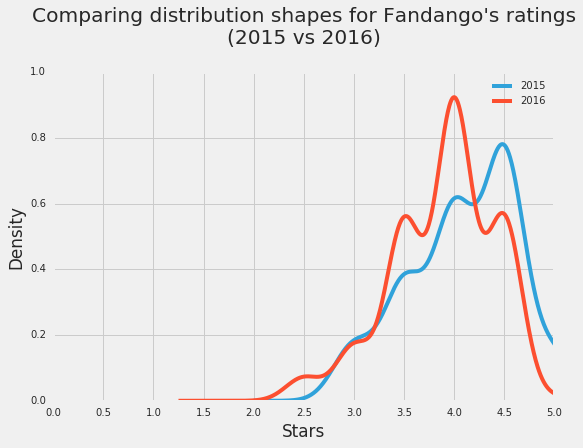

In [20]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
reviews_2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

The 2015 scores appear a bit closer to normal than for 2016; although both center around 4, with 2015 average a bit over that. The 2016 scores have more ratings that dip under 3 compared to 2015, suggesting there might be a change in the overall rating for "popular" movies. The distribution for 2016 is a bit odd around 4. If we take the fact the average for 2016 is lower and that there are more movies in the lower ratings, it is possible that there is a score change. 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


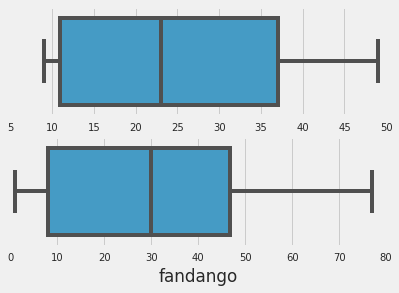

In [21]:
import seaborn  as sns
fig, (ax1, ax2)  = plt.subplots(2,1)
ax1 = sns.boxplot(fandango_2015['Fandango_Stars'].value_counts(), ax = ax1)

ax2 = sns.boxplot(reviews_2016['fandango'].value_counts(),ax = ax2)

In [22]:
reviews_2016['fandango'].value_counts(normalize = True).sort_index()

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

In [23]:
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

DEFINITELY higher scores for 2015. 40% of the scores are 4.5 or above, as compared to 25% for the following year. Plus, the scores that are 3.5 or below for 2016 is around 34% as compared to just 26% for 2015. Fandango is some shady cats bruh, I'm telling you. 

In [24]:
def sum_stat(ser):
    mean = ser.mean()
    mode = ser.mode()
    median = ser.median()
    print(mean,'\n', mode,'\n', median)
    

In [25]:
sum_stat(fandango_2015['Fandango_Stars'])

4.0852713178294575 
 0    4.5
dtype: float64 
 4.0


In [157]:
sum_stat(reviews_2016['fandango'])

3.887434554973822 
 0    4.0
dtype: float64 
 4.0


In [36]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = reviews_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = reviews_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = reviews_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


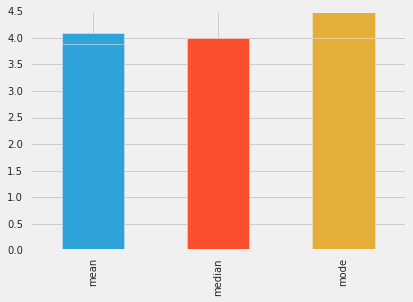

In [40]:
summary['2015'].plot.bar()
summary['2016'].plot.bar()